In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

Parseamos los datos para que sea 28 * 28 en Vez de 3 dimensiones a ser 2

In [5]:
X_train = np.reshape( x_train, (60000,28*28) )
X_test = np.reshape( x_test, (x_test.shape[0],x_test.shape[1]*x_test.shape[2]) )

In [6]:
X_train.shape

(60000, 784)

Dividimos entre la gama de 255

In [7]:
X_train = X_train/255.0
X_test = X_test/255.0

In [8]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Dependiendo si es par lo parseamos a 0 - 1 el booleano el resultado

In [9]:
y_train = (y_train%2 == 0).astype(int)
y_test  = (y_test%2 == 0).astype(int)

In [10]:
y_train

array([0, 1, 1, ..., 0, 1, 1])

Marcamos las dimensiones para poder indicar en la red neuronal

In [11]:
dimension_entrada = X_train.shape[1]
dimension_salida = 1
dimension_entrada

784

In [12]:
import pathlib

path=str(pathlib.Path().resolve())+"/"

Decimos que utilizaremos un Sequential y utilizaremos el Sigmoide para intervalos próximos a 0-1

In [13]:
modelo = Sequential()
modelo.add(Dense(32,activation="relu",input_dim=dimension_entrada))
modelo.add(Dense(1, activation="sigmoid"))
sgd=SGD(learning_rate=0.1)
modelo.compile(loss="binary_crossentropy", optimizer=sgd, metrics=["accuracy","mean_squared_error"])
modelo.summary()

c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\deep-learning\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,153 (98.25 KB)

 Trainable params: 25,153 (98.25 KB)

 Non-trainable params: 0 (0.00 B)

Definimos el modelo que entrenamos

In [14]:
epochs = 20
batch_size = 20
checkpoint_cb = keras.callbacks.ModelCheckpoint(path+'model_keras_callbacks.keras',save_best_only=True)
history = modelo.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,callbacks=[checkpoint_cb])

Epoch 1/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 889us/step - accuracy: 0.9212 - loss: 0.2020 - mean_squared_error: 0.0596
Epoch 2/20
 184/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 912us/step - accuracy: 0.9703 - loss: 0.0913 - mean_squared_error: 0.0252

c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\deep-learning\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 843us/step - accuracy: 0.9726 - loss: 0.0796 - mean_squared_error: 0.0217
Epoch 3/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 875us/step - accuracy: 0.9788 - loss: 0.0597 - mean_squared_error: 0.0162
Epoch 4/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 782us/step - accuracy: 0.9825 - loss: 0.0487 - mean_squared_error: 0.0132
Epoch 5/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 818us/step - accuracy: 0.9852 - loss: 0.0419 - mean_squared_error: 0.0112
Epoch 6/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 808us/step - accuracy: 0.9879 - loss: 0.0362 - mean_squared_error: 0.0095
Epoch 7/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 820us/step - accuracy: 0.9882 - loss: 0.0341 - mean_squared_error: 0.0092
Epoch 8/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 812us/step - accuracy: 0.9908 - loss: 0.0282 - mean_squared_error: 0.0073
Epoch 9/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 804us/step - accuracy: 0.9916 - loss: 0.0253 - mean_squared_error: 0.0065
Epoch 10/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 794us/step - 

<Axes: >

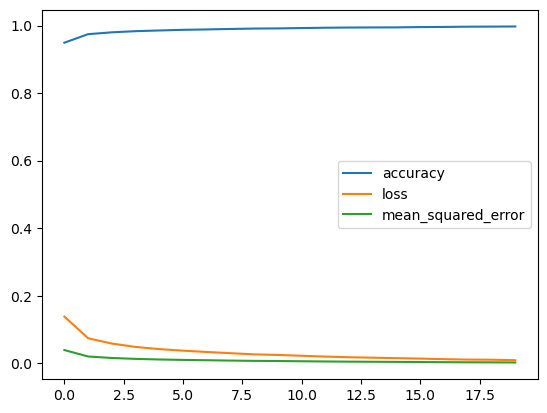

In [15]:
pd.DataFrame(history.history).plot()

Y hacemos una prueba de predicción para ver los valores parejos

In [16]:
X_nueva = X_test[:10]
y_pred = modelo.predict(X_nueva)

print(y_pred,y_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[[5.2207650e-07]
 [9.9999756e-01]
 [2.3591251e-03]
 [1.0000000e+00]
 [9.9819273e-01]
 [8.8962523e-05]
 [9.9999899e-01]
 [2.3661312e-05]
 [1.5811878e-01]
 [3.0277405e-07]] [0 1 0 1 1 0 1 0 0 0]
